# Analyzing Spotify's Top Hits: Trends and Insights

### About Spotify

Spotify changed the way we listen to music, when it launched in Sweden in 2008. It gave people access to millions of songs at their fingertips, allowing them to discover, share, and enjoy music like never before. With a free version supported by ads and a Premium option offering offline listening, better sound quality, and an ad-free experience, Spotify quickly became a global favorite. Today, it’s the world’s leading audio streaming platform, connecting over 500 million users—including 200 million Premium subscribers across more than 180 countries. Beyond transforming music discovery, Spotify has become a vital part of the music industry, contributing more revenue to artists than any other platform.

## About Dataset

### Context
Dataset contains a comprehensive list of the most famous songs and most streamed songs as listed on Spotify.

It provides insights into each song's:
- Attributes
- Popularity
- Presence on various music platforms

### The dataset includes information such as track name:
- Artist's name
- Release date
- Spotify playlists and charts
- Streaming statistics
- Apple Music presence
- Deezer presence
- Shazam charts
- Various audio features
ous audio features

## Contents

1. IMPOPRTING LIBRARIES AND LOADING DATA

2. DATA INFORMATION

3. EXPLORATORY DATA ANALYSIS

4. CONCLUSION

## 1. Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans

In [4]:
location = r"E:\Projects\Spotify songs\Popular_Spotify_Songs.csv"
songs = pd.read_csv(location, encoding='latin-1')


In [5]:
songs.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

## 2. Data information

In [6]:
songs.info

<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

In [7]:
songs.shape

(953, 24)

## 3. Exploratory data analysis (EDA)

In [8]:
# check for null values
songs.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
# Check for dulpicate values
songs.duplicated().value_counts()

False    953
Name: count, dtype: int64

In [10]:
# more info
songs.shape
songs.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [11]:
# Mathematical Descriptive overview of data
songs.describe().T

count          mean           std     min          25%  \
artist_count          953.0  1.556139e+00  8.930442e-01     1.0          1.0   
released_year         953.0  2.018238e+03  1.111622e+01  1930.0       2020.0   
released_month        953.0  6.033578e+00  3.566435e+00     1.0          3.0   
released_day          953.0  1.393075e+01  9.201949e+00     1.0          6.0   
in_spotify_playlists  953.0  5.200125e+03  7.897609e+03    31.0        875.0   
in_spotify_charts     953.0  1.200944e+01  1.957599e+01     0.0          0.0   
streams               953.0  5.141928e+08  5.665617e+08  2762.0  141720999.0   
in_apple_playlists    953.0  6.781217e+01  8.644149e+01     0.0         13.0   
in_apple_charts       953.0  5.190871e+01  5.063024e+01     0.0          7.0   
in_deezer_charts      953.0  2.666317e+00  6.035599e+00     0.0          0.0   
bpm                   953.0  1.225404e+02  2.805780e+01    65.0        100.0   
danceability_%        953.0  6.696957e+01  1.463061e+01    23.0         57.0   
valence_%             953.0  5.143127e+01  2.348063e+01     4.0         32.0   
energy_%              953.0  6.427912e+01  1.655053e+01     9.0         53.0   
acousticness_%        953.0  2.705771e+01  2.599608e+01     0.0          6.0   
instrumentalness_%    953.0  1.581322e+00  8.409800e+00     0.0          0.0   
liveness_%            953.0  1.821301e+01  1.371122e+01     3.0         10.0   
speechiness_%         953.0  1.013116e+01  9.912888e+00     2.0          4.0   

                              50%          75%           max  
artist_count                  1.0          2.0  8.000000e+00  
released_year              2022.0       2022.0  2.023000e+03  
released_month                6.0          9.0  1.200000e+01  
released_day                 13.0         22.0  3.100000e+01  
in_spotify_playlists       2224.0       5542.0  5.289800e+04  
in_spotify_charts             3.0         16.0  1.470000e+02  
streams               290833204.0  673801126.0  3.703895e+09  
in_apple_playlists           34.0         88.0  6.720000e+02  
in_apple_charts              38.0         87.0  2.750000e+02  
in_deezer_charts              0.0          2.0  5.800000e+01  
bpm                         121.0        140.0  2.060000e+02  
danceability_%               69.0         78.0  9.600000e+01  
valence_%                    51.0         70.0  9.700000e+01  
energy_%                     66.0         77.0  9.700000e+01  
acousticness_%               18.0         43.0  9.700000e+01  
instrumentalness_%            0.0          0.0  9.100000e+01  
liveness_%                   12.0         24.0  9.700000e+01  
speechiness_%                 6.0         11.0  6.400000e+01

In [12]:
# Overall decription 
songs.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.530000e+02   
mean            5200.124869          12.009444  5.141928e+08   
std             7897.608990          19.575992  5.665617e+08   
min               31.000000           0.000000  2.762000e+03   
25%              875.000000           0.000000  1.417210e+08   
50%             2224.000000           3.000000  2.908332e+08   
75%             5542.000000          16.000000  6.738011e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          953.000000       953.000000        953.000000  953.000000   
mean            67.812172        51.908709          2.666317  122.540399   
std             86.441493        50.630241          6.035599   28.057802   
min              0.000000         0.000000          0.000000   65.000000   
25%             13.000000         7.000000          0.000000  100.000000   
50%             34.000000        38.000000          0.000000  121.000000   
75%             88.000000        87.000000          2.000000  140.000000   
max            672.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count       953.00000  953.000000  953.000000      953.000000   
mean         66.96957   51.431270   64.279119       27.057712   
std          14.63061   23.480632   16.550526       25.996077   
min          23.00000    4.000000    9.000000        0.000000   
25%          57.00000   32.000000   53.000000        6.000000   
50%          69.00000   51.000000   66.000000       18.000000   
75%          78.00000   70.000000   77.000000       43.000000   
max          96.00000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          953.000000  953.000000     953.000000  
mean             1.581322   18.213012      10.131165  
std              8.409800   13.711223       9.912888  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

### Visualizations:

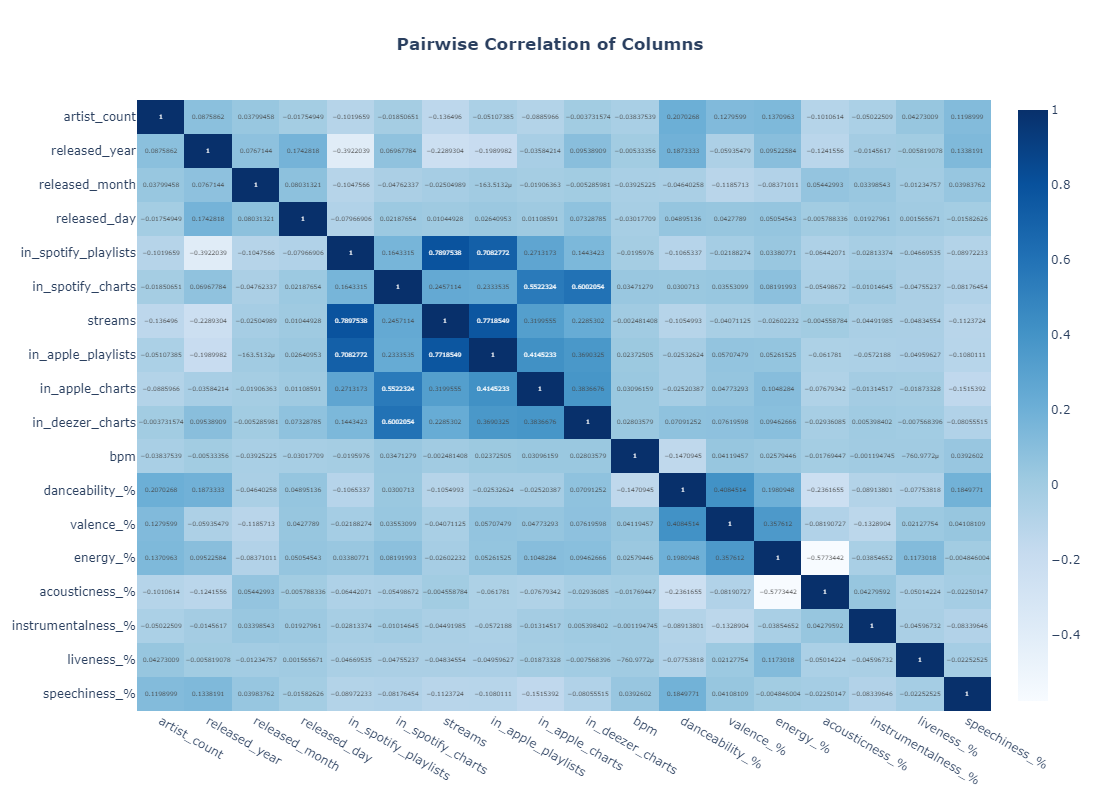

In [14]:
# correlation matrix
numeric_columns = songs.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()

fig = px.imshow(
    corr_matrix, 
    text_auto=True, 
    height=800, 
    width=800, 
    color_continuous_scale=px.colors.sequential.Blues, 
    aspect='auto', 
    title='<b>Pairwise Correlation of Columns</b>'
)
fig.update_layout(title_x=0.5)
fig.show()

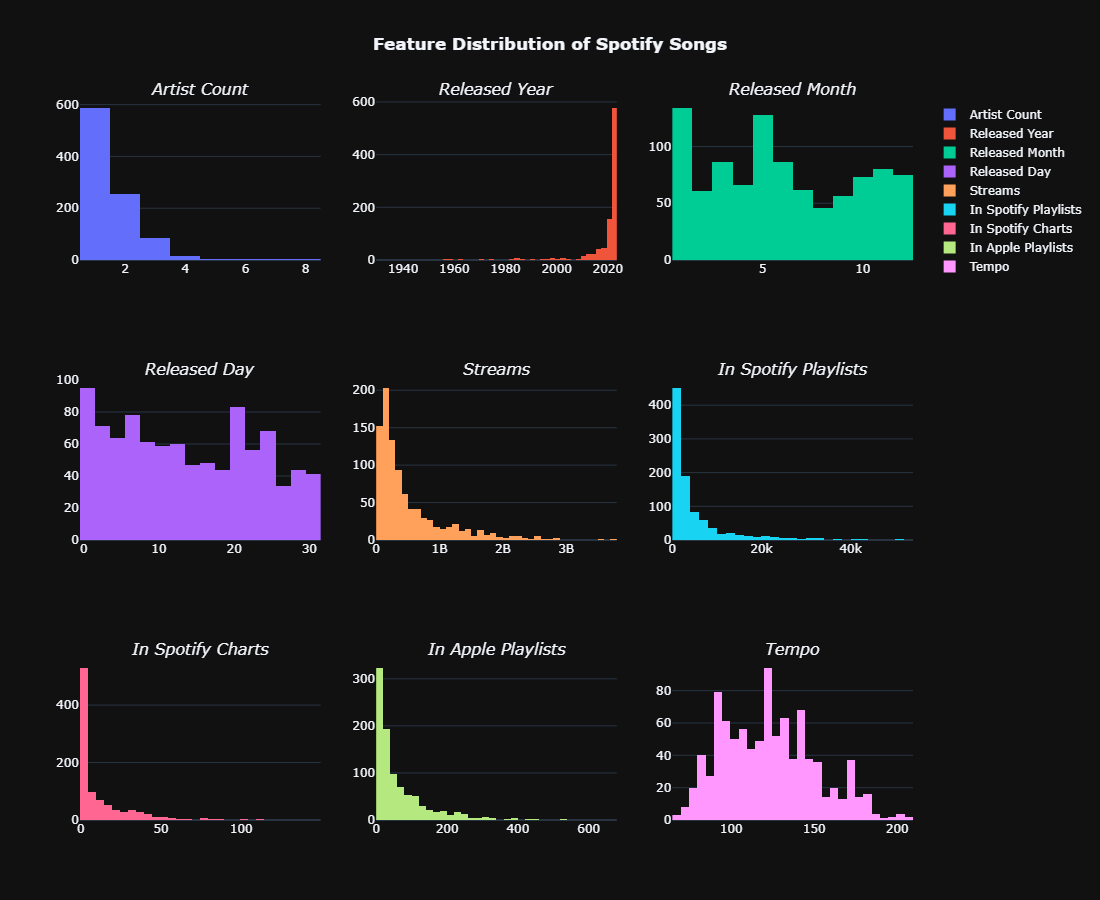

In [15]:
# feature distribution

numeric_features = ['artist_count', 'released_year', 'released_month', 'released_day',
    'streams', 'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts',
    'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        '<i>Artist Count', '<i>Released Year', '<i>Released Month', 
        '<i>Released Day', '<i>Streams', '<i>In Spotify Playlists',
        '<i>In Spotify Charts', '<i>In Apple Playlists', '<i>Tempo'
    )
)

fig.add_trace(go.Histogram(x=songs['artist_count'], name='Artist Count'), row=1, col=1)
fig.add_trace(go.Histogram(x=songs['released_year'], name='Released Year'), row=1, col=2)
fig.add_trace(go.Histogram(x=songs['released_month'], name='Released Month'), row=1, col=3)
fig.add_trace(go.Histogram(x=songs['released_day'], name='Released Day'), row=2, col=1)
fig.add_trace(go.Histogram(x=songs['streams'], name='Streams'), row=2, col=2)
fig.add_trace(go.Histogram(x=songs['in_spotify_playlists'], name='In Spotify Playlists'), row=2, col=3)
fig.add_trace(go.Histogram(x=songs['in_spotify_charts'], name='In Spotify Charts'), row=3, col=1)
fig.add_trace(go.Histogram(x=songs['in_apple_playlists'], name='In Apple Playlists'), row=3, col=2)
fig.add_trace(go.Histogram(x=songs['bpm'], name='Tempo'), row=3, col=3)

fig.update_layout(
    height=900, width=900,
    title_text='<b>Feature Distribution of Spotify Songs</b>',
    template='plotly_dark',
    title_x=0.5
)

fig.show()


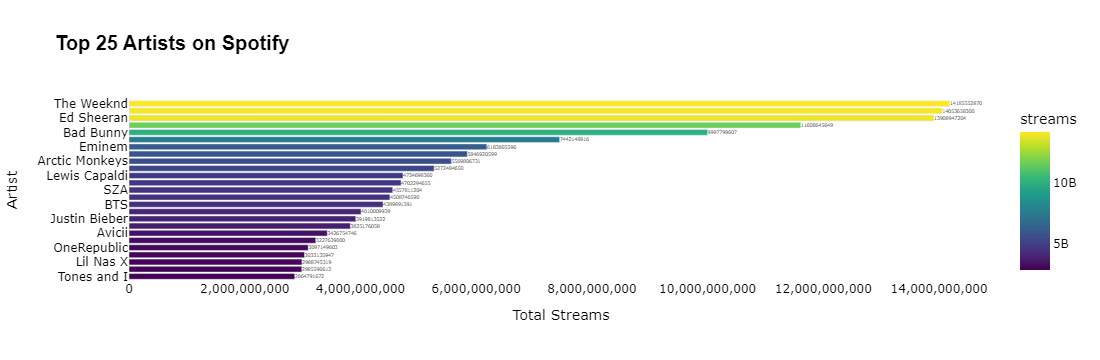

In [16]:
# top artists

top_artists = songs.groupby('artist(s)_name')['streams'].sum().nlargest(25).reset_index()

fig = px.bar(
    top_artists.sort_values(by='streams', ascending=True),
    x='streams',
    y='artist(s)_name',
    text='streams',
    title='<b>Top 25 Artists on Spotify</b>',
    color='streams',
    color_continuous_scale='Viridis'
)
fig.update_layout(
    xaxis_title='Total Streams',
    yaxis_title='Artist',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    title_font=dict(size=20, color='black', family='Arial'),
    xaxis=dict(tickformat=',.0f'),  
    showlegend=False  
)
fig.update_traces(texttemplate='%{text:.0f}', textposition='auto')
fig.show()

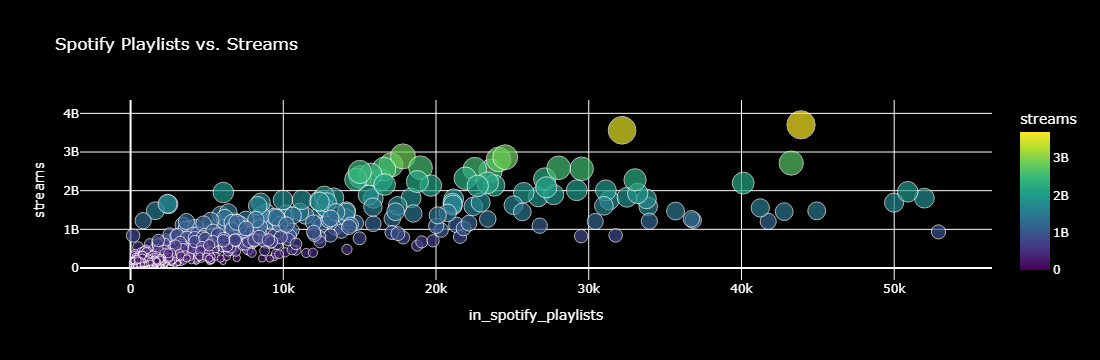

In [17]:
# Scatter polt : Playlist and Streams

fig = px.scatter(
    songs, x='in_spotify_playlists', y='streams', color='streams', 
    size='streams', hover_data=['track_name', 'artist(s)_name'], 
    title='Spotify Playlists vs. Streams', 
    color_continuous_scale='Viridis'
)
fig.update_layout(
    plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white')
)
fig.show()

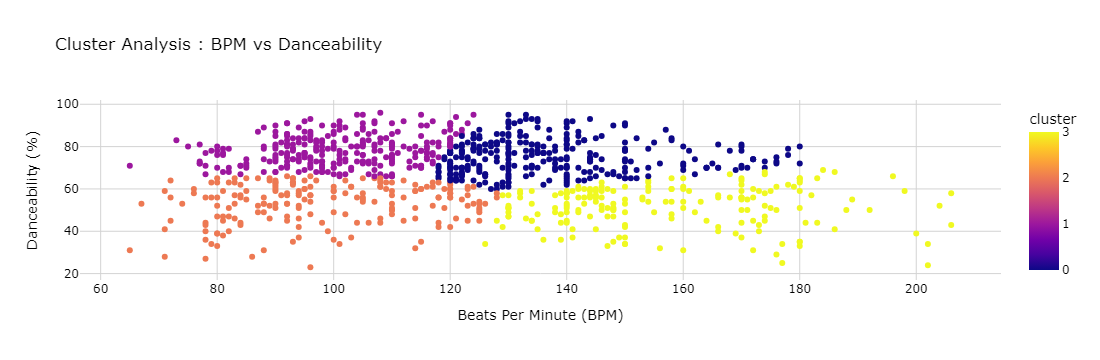

In [26]:
#Clusters of Tempo and Danceability 

features = ['bpm', 'danceability_%']

scaled_data = StandardScaler().fit_transform(songs[features])
kmeans = KMeans(n_clusters=4, random_state=42)
songs['cluster'] = kmeans.fit_predict(scaled_data)

fig = px.scatter(
    songs, 
    x='bpm', 
    y='danceability_%', 
    color='cluster', 
    hover_data=['track_name', 'artist(s)_name', 'streams'], 
    title='Cluster Analysis : BPM vs Danceability',
    color_discrete_sequence=px.colors.qualitative.Set2  
)

fig.update_layout(
    xaxis=dict(
        title='Beats Per Minute (BPM)',
        showgrid=True,  
        gridcolor='lightgray',  
        zeroline=True,
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title='Danceability (%)',
        showgrid=True,  
        gridcolor='lightgray',  
        zeroline=True,
        zerolinecolor='gray'
    ),
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    font=dict(color='black')  
)

fig.show()


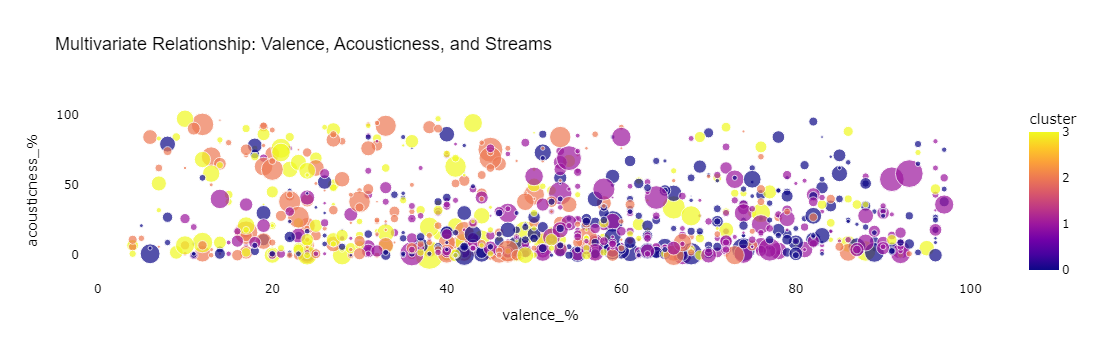

In [23]:
#  Multivariate Relationship between Valence, Acousticness, and Streams

fig = px.scatter(
    songs,
    x='valence_%',
    y='acousticness_%',
    color='cluster',
    size='streams',
    hover_data=['track_name', 'artist(s)_name'],
    title='Multivariate Relationship: Valence, Acousticness, and Streams',
    color_discrete_sequence=px.colors.qualitative.Safe  
)

fig.update_layout(
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    font=dict(color='black'),  
    title_font=dict(size=18, color='black', family='Arial')
)

fig.show()


## 4. Conclusion

The analysis of Spotify's top hits gives us a fascinating glimpse into what makes a song a global sensation. Artists like The Weeknd, Ed Sheeran, and Bad Bunny clearly resonate deeply with listeners, racking up billions of streams and becoming household names. One of the biggest takeaways is how **playlists** play a crucial role in a song’s success. The more playlists a song is featured in, the more likely it is to reach massive audiences. It’s also interesting to see that songs with a balance of positive energy (valence) and melody (acousticness) tend to **perform better** they seem to strike the perfect emotional chord with listeners.

**Timing is another key factor**. Songs released in recent years, particularly after 2010, dominate the charts, and some months like May and October see more releases, possibly because of smart marketing strategies or seasonal appeal. High-energy, danceable tracks also grab attention, especially when they have a tempo that gets people moving. What stands out most is that while thousands of songs are uploaded daily, only a select few achieve hit status. These successes are driven by a mix of factors: being included in playlists, connecting emotionally through valence and energy, and being released at the right time. 

##### *In the end, it’s not just about making good music—it’s about knowing your audience and where they’ll find you.*

->the end